In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
data = pd.read_csv('../diem_thptqg_2019.csv')
data.head()

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH
0,3000001,4.8,6.50,3.8,NaN,NaN,NaN,NaN,4.25,6.50,8.75,6.5
1,3000002,3.0,2.25,NaN,NaN,NaN,NaN,NaN,2.75,3.00,NaN,NaN
2,3000003,3.2,2.50,NaN,NaN,NaN,NaN,NaN,2.25,3.75,NaN,NaN
3,3000004,5.8,3.25,NaN,NaN,NaN,NaN,NaN,2.50,5.50,NaN,NaN
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,NaN,NaN,NaN,NaN


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18485 entries, 0 to 18484
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   So Bao Danh  18485 non-null  int64  
 1   Toan         18456 non-null  float64
 2   Ngu Van      18256 non-null  float64
 3   Ngoai Ngu    16819 non-null  float64
 4   Vat Ly       6700 non-null   float64
 5   Hoa Hoc      6731 non-null   float64
 6   Sinh Hoc     6645 non-null   float64
 7   KHTN         6571 non-null   float64
 8   Lich Su      11682 non-null  float64
 9   Dia Ly       11601 non-null  float64
 10  GDCD         10229 non-null  float64
 11  KHXH         10229 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.7 MB


In [103]:
subject_list = data.columns[1:].to_list()
subject_list = [x for x in subject_list  if x not in ['KHTN', 'KHXH']]
subject_list

['Toan',
 'Ngu Van',
 'Ngoai Ngu',
 'Vat Ly',
 'Hoa Hoc',
 'Sinh Hoc',
 'Lich Su',
 'Dia Ly',
 'GDCD']

In [104]:
data[subject_list]

,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,Lich Su,Dia Ly,GDCD
0,4.8,6.50,3.8,NaN,NaN,NaN,4.25,6.50,8.75
1,3.0,2.25,NaN,NaN,NaN,NaN,2.75,3.00,NaN
2,3.2,2.50,NaN,NaN,NaN,NaN,2.25,3.75,NaN
3,5.8,3.25,NaN,NaN,NaN,NaN,2.50,5.50,NaN
4,6.8,6.00,8.6,6.0,3.5,4.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18480,7.2,4.75,3.0,NaN,NaN,NaN,5.00,6.00,7.50
18481,4.4,7.00,3.6,NaN,NaN,NaN,3.50,6.25,6.75
18482,5.8,5.00,2.8,NaN,NaN,NaN,2.75,4.50,5.50
18483,5.8,4.00,2.8,NaN,NaN,NaN,5.50,6.50,8.25


Thực hiện thêm cột số môn thi đối với mỗi thí sinh

In [105]:
data['So mon thi'] = data[subject_list].notna().sum(axis= 1)
data['Diem trung binh'] = data[subject_list].mean(axis= 1).round(2).to_list()
data.head()

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So mon thi,Diem trung binh
0,3000001,4.8,6.50,3.8,NaN,NaN,NaN,NaN,4.25,6.50,8.75,6.5,6,5.77
1,3000002,3.0,2.25,NaN,NaN,NaN,NaN,NaN,2.75,3.00,NaN,NaN,4,2.75
2,3000003,3.2,2.50,NaN,NaN,NaN,NaN,NaN,2.25,3.75,NaN,NaN,4,2.92
3,3000004,5.8,3.25,NaN,NaN,NaN,NaN,NaN,2.50,5.50,NaN,NaN,4,4.26
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,NaN,NaN,NaN,NaN,6,5.86


## Clean data

Thực hiện thay thế các giá trị nan bằng các giá trị -1

In [106]:
data_number= data.replace(np.nan, -1)
data_number.head()

,So Bao Danh,Toan,Ngu Van,Ngoai Ngu,Vat Ly,Hoa Hoc,Sinh Hoc,KHTN,Lich Su,Dia Ly,GDCD,KHXH,So mon thi,Diem trung binh
0,3000001,4.8,6.50,3.8,-1.0,-1.0,-1.00,-1.00,4.25,6.50,8.75,6.5,6,5.77
1,3000002,3.0,2.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.75,3.00,-1.00,-1.0,4,2.75
2,3000003,3.2,2.50,-1.0,-1.0,-1.0,-1.00,-1.00,2.25,3.75,-1.00,-1.0,4,2.92
3,3000004,5.8,3.25,-1.0,-1.0,-1.0,-1.00,-1.00,2.50,5.50,-1.00,-1.0,4,4.26
4,3000005,6.8,6.00,8.6,6.0,3.5,4.25,4.58,-1.00,-1.00,-1.00,-1.0,6,5.86


## Số lượng thí sinh các môn thi

THỰC HIỆN TÍNH TỔNG SỐ THÍ SINH:

In [108]:
total_count = data_number['So Bao Danh'].count()
total_count

np.int64(18485)

Tính tổng thí sinh thi mỗi môn thi

In [109]:
subject_count= []
for subject in subject_list +  ['KHTN', 'KHXH']:

  temp = data_number[subject][data_number[subject] != -1].count()
  subject_count.append(temp)
  # break
print(subject_count)

probability_subject= subject_count/total_count
print(probability_subject)

[np.int64(18456), np.int64(18256), np.int64(16819), np.int64(6700), np.int64(6731), np.int64(6645), np.int64(11682), np.int64(11601), np.int64(10229), np.int64(6571), np.int64(10229)]
[0.99843116 0.98761158 0.90987287 0.36245605 0.36413308 0.35948066
 0.63197187 0.62758994 0.5533676  0.35547741 0.5533676 ]


Hiển thị bằng đồ thị.

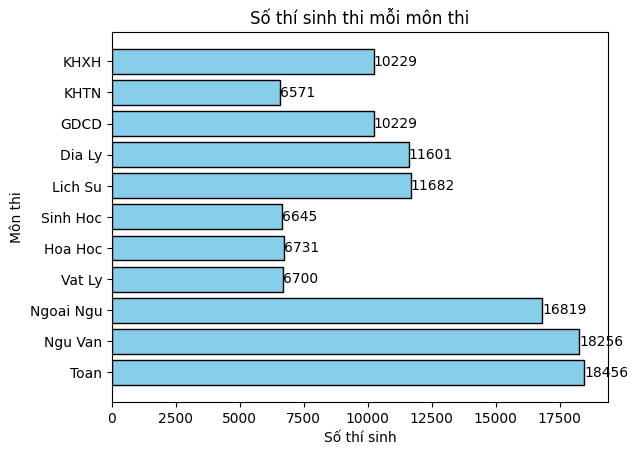

In [110]:
plt.barh(subject_list + ['KHTN', 'KHXH'], subject_count, color='skyblue', edgecolor='black')
for i, v in enumerate(subject_count):
    plt.text(v, i, str(v), color='black', ha='left', va='center')
plt.title('Số thí sinh thi mỗi môn thi')
plt.ylabel('Môn thi')
plt.xlabel('Số thí sinh')
plt.show()

Các môn thi toán, ngữ văn và ngoại ngữ là môn thi bắt buộ nên số lượng thí sinh sẽ đông\
Thí sinh thi tổ hợp KHXH (Sử + Địa + GDCD) nhiều hơn thí sinh thi tổ hợp KHTN (Lý + Hóa + Sinh).

Thêm yếu tố phần trăm số thí sinh dự thi đối với mỗi môn

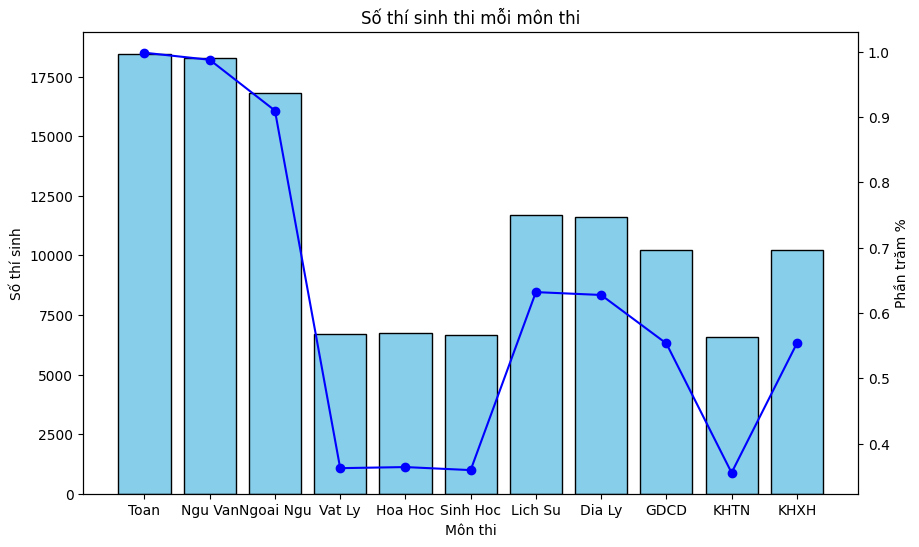

In [111]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(subject_list +  ['KHTN', 'KHXH'], subject_count, color= 'skyblue', edgecolor= 'black')
ax1.set_xlabel('Môn thi')
ax1.set_ylabel('Số thí sinh', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2= ax1.twinx()
ax2.plot(subject_list  + ['KHTN', 'KHXH'], probability_subject, marker= 'o', color= 'blue')
ax2.set_ylabel('Phần trăm %', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Số thí sinh thi mỗi môn thi')
plt.show()

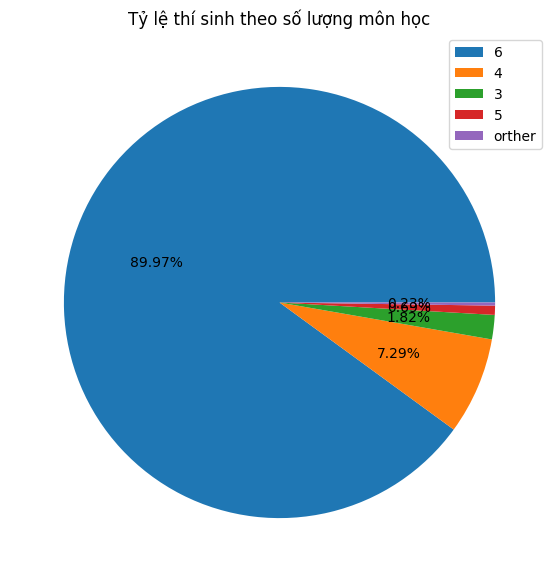

In [112]:
subject_num_p = data['So mon thi'].value_counts().reset_index()
subject_num_p.columns = ['So mon thi', 'So thi sinh']
df_filtered = subject_num_p[subject_num_p['So thi sinh'] >= 50]

orther = subject_num_p[subject_num_p['So thi sinh'] < 50]['So thi sinh'].sum()
df_final = pd.concat([df_filtered, pd.DataFrame({'So mon thi': 'orther', 'So thi sinh': [orther]})], ignore_index=True)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

ax.pie(df_final['So thi sinh'], autopct='%.2f%%')

ax.legend(labels=(df_final['So mon thi']), loc='upper right')
plt.title('Tỷ lệ thí sinh theo số lượng môn học')

plt.show()

## Thực hiện in phổ điểm các môn thi:

Biểu đồ Box plot các môn học khác nhau

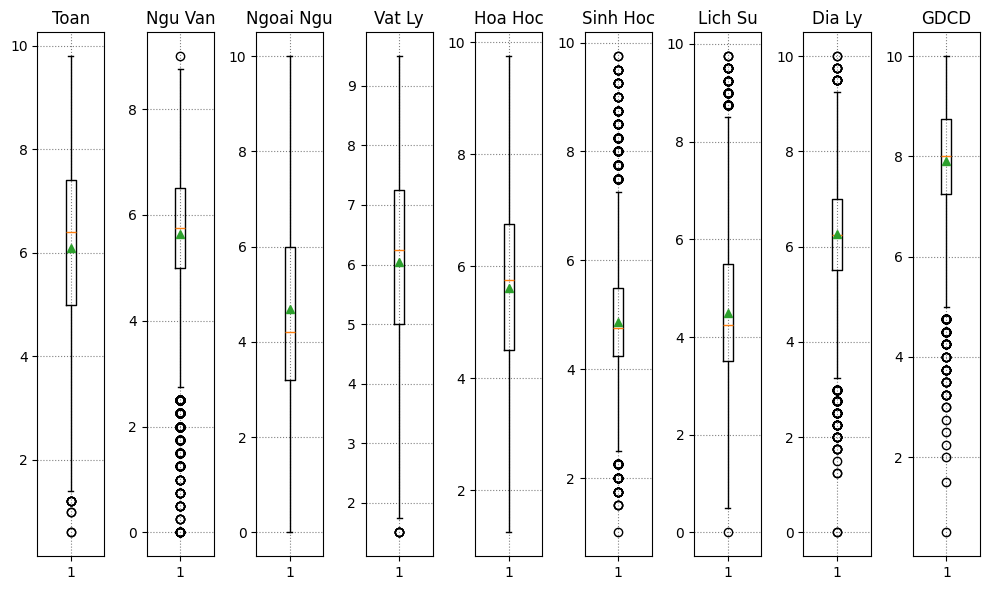

In [113]:
import matplotlib.pyplot as plt

def boxplot_subjects():
    num_subjects = len(subject_list)
    plt.figure(figsize=(10, 6)) 

    for i, subject in enumerate(subject_list):
        subject_df = data[subject].dropna()
        plt.subplot(1, num_subjects, i + 1)  
        plt.boxplot(subject_df, vert=True, showmeans=True)
        plt.title(subject)
        plt.grid(color='gray', linestyle='dotted')

    plt.tight_layout() 
    plt.show()

boxplot_subjects()




Từ biểu đồ trên ta có thể nhận thấy phân bố dữ liệu của điểm các môn\
môn giáo dục công dân có độ phân tán khá nhỏ và điểm khá cao trong khi các môn như toán, ngoại ngữ, vật lý và hóa học có độ phân tán lớn hơn\
Môn ngữ văn xuất hiện nhiều giá trị ngoại lại với các điểm dưới 2 cùng với đó là môn giáo dục công dân cũng có ngoại lai với điểm nhỏ hơn 5 
...


Để rõ hơn ta hiển thị phân phối cụ thể từng môn học

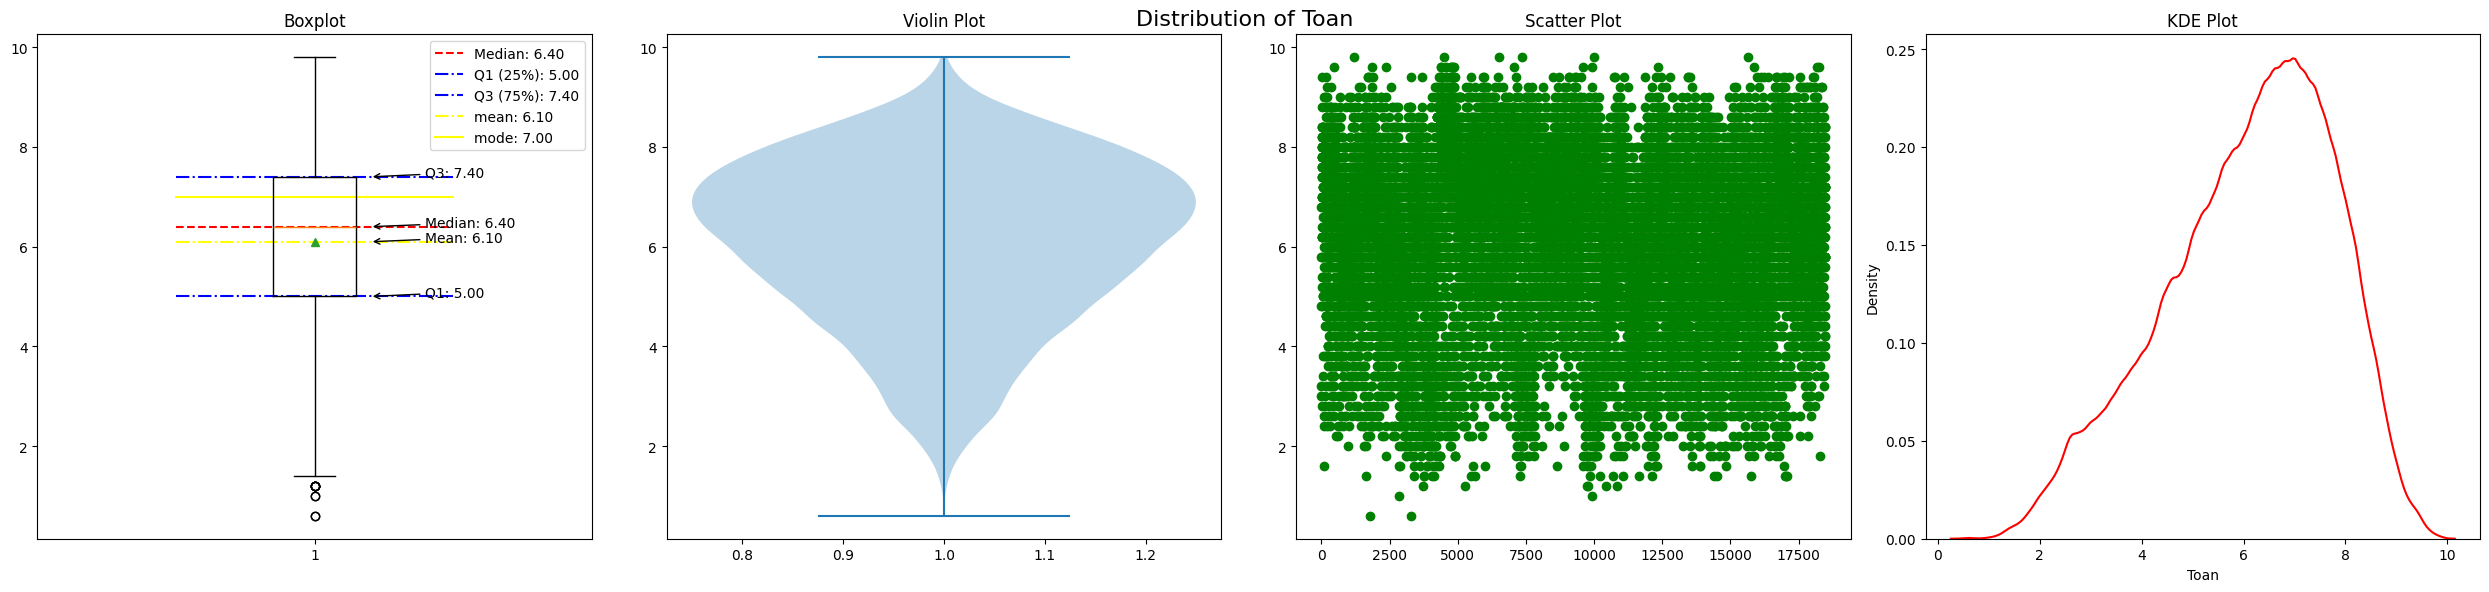

In [114]:
def plot_distributions(subject):
    subject_df = data_number[data_number[subject] >= 0]  # Lọc dữ liệu


    if subject_df.empty:
        print(f"Dữ liệu cho {subject} không hợp lệ hoặc rỗng.")
        return


    fig, ax = plt.subplots(1, 4, figsize=(25, 6))


    # Show boxplot
    median = np.percentile(subject_df[subject], 50)
    q1 = np.percentile(subject_df[subject], 25)
    q3 = np.percentile(subject_df[subject], 75)
    mean = np.mean(subject_df[subject])
    mode = subject_df[subject].mode()[0]
    ax[0].plot([0.75, 1.25], [median, median], color='red', linestyle='--', label=f'Median: {median:.2f}')
    ax[0].plot([0.75, 1.25], [q1, q1], color='blue', linestyle='-.', label=f'Q1 (25%): {q1:.2f}')
    ax[0].plot([0.75, 1.25], [q3, q3], color='blue', linestyle='-.', label=f'Q3 (75%): {q3:.2f}')
    ax[0].plot([0.75, 1.25], [mean, mean], color='yellow', linestyle='-.', label=f'mean: {mean:.2f}')
    ax[0].plot([0.75, 1.25], [mode, mode], color='yellow', label=f'mode: {mode:.2f}')


    ax[0].legend(loc='upper right')
    ax[0].boxplot(subject_df[subject], showmeans=True)

    ax[0].annotate(f'Q1: {q1:.2f}', xy=(1.1, q1), xytext=(1.2, q1),
                  arrowprops=dict(facecolor='black', arrowstyle='->'))
    ax[0].annotate(f'Median: {median:.2f}', xy=(1.1, median), xytext=(1.2, median),
                  arrowprops=dict(facecolor='blue', arrowstyle='->'))
    ax[0].annotate(f'Q3: {q3:.2f}', xy=(1.1, q3), xytext=(1.2, q3),
                  arrowprops=dict(facecolor='green', arrowstyle='->'))
    ax[0].annotate(f'Mean: {mean:.2f}', xy=(1.1, mean), xytext=(1.2, mean),
                  arrowprops=dict(facecolor='red', arrowstyle='->'))

    ax[0].set_title('Boxplot')

    # Hiển thị biểu đồ violin
    ax[1].violinplot(subject_df[subject])
    ax[1].set_title('Violin Plot')

    ax[2].scatter(subject_df.index, subject_df[subject], color='green')
    ax[2].set_title('Scatter Plot')

    sns.kdeplot(subject_df[subject], ax=ax[3], bw_adjust=0.5, color='red')
    ax[3].set_title('KDE Plot')

    plt.tight_layout()
    plt.suptitle(f'Distribution of {subject}', fontsize=16)
    plt.show()

plot_distributions('Toan')

Từ các biểu đồ trên ta có thể thấy phổ điểm môn toán có xu hướng lệch phải và trung bình là 6.1 trung vị là 6.4 mode: 7 . Nhận thấy rằng trung bình và trung vị nằm trong khoảng giữa q1 và q3  như vậy dữ liệu có phân phối gần như đối xứng( hơi lệch phải). Dữ liệu ít biến động và tập trung quanh trung vị. có một số điểm ngoại lai đó là những điểm liệt 0 hoặc 1. Ta cs thể thực hiện hiển thị đối với một số môn thi khác để hiểu rõ hơn về phổ điểm thi:


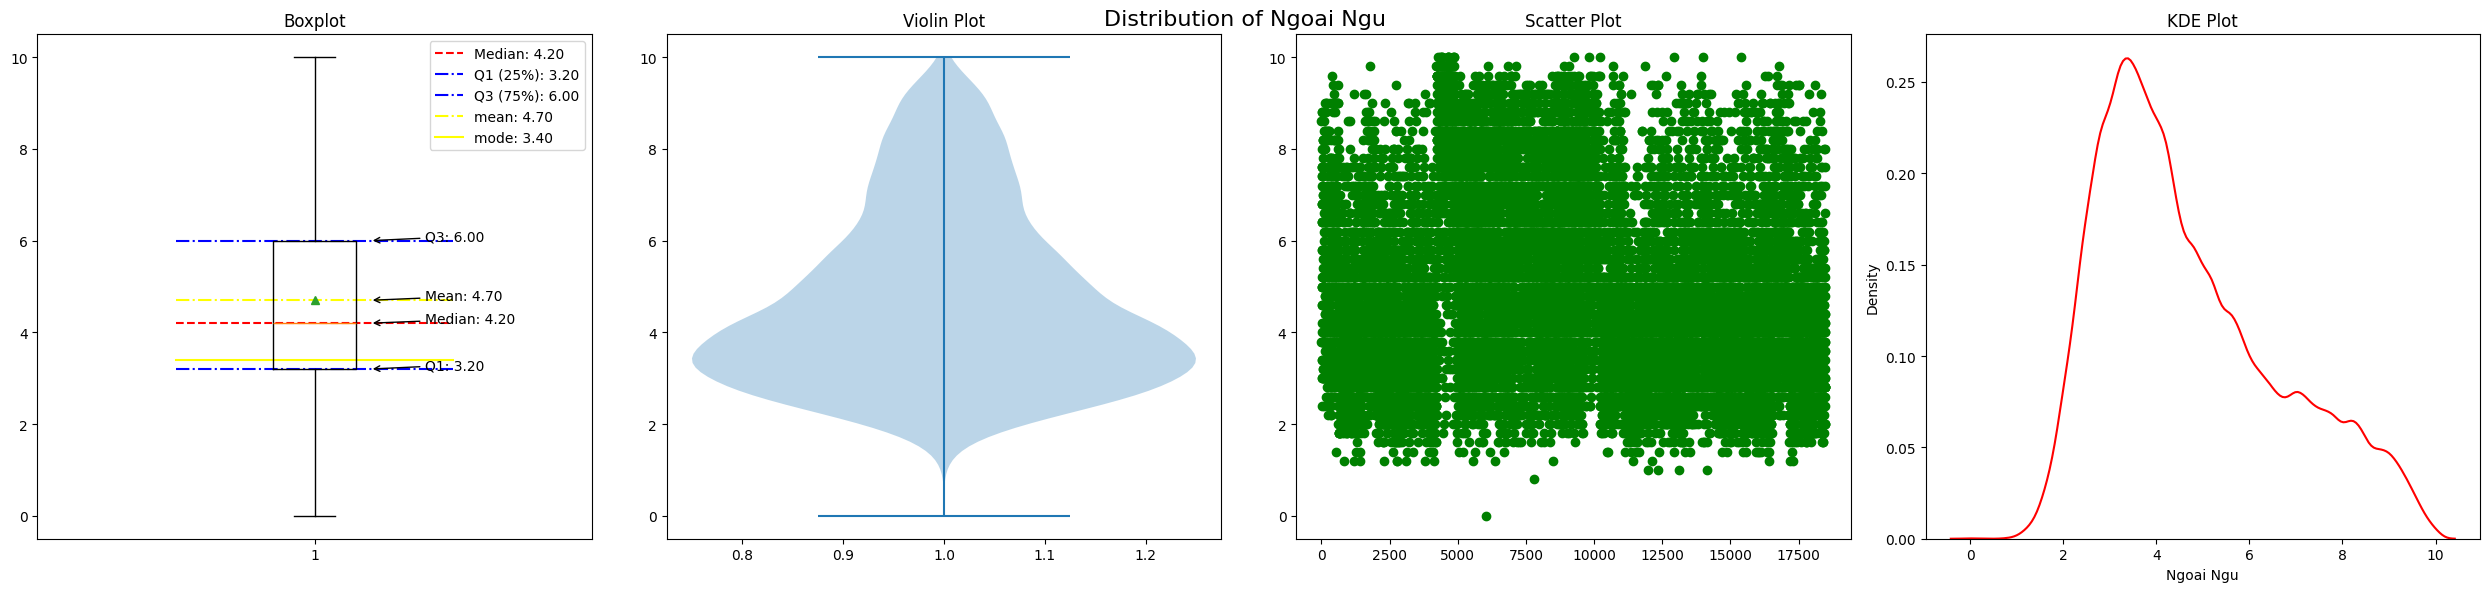

In [17]:
plot_distributions('Ngoai Ngu')

Nhận thấy rằng đối với môn ngoại ngữ thì tỷ lệ thí sinh bị điểm thấp khá lớn trung bình là 4.7 trung vị là: 4.2 phân phối bị lệch trái

Thực hiện hiển thị với tất cả các môn học:

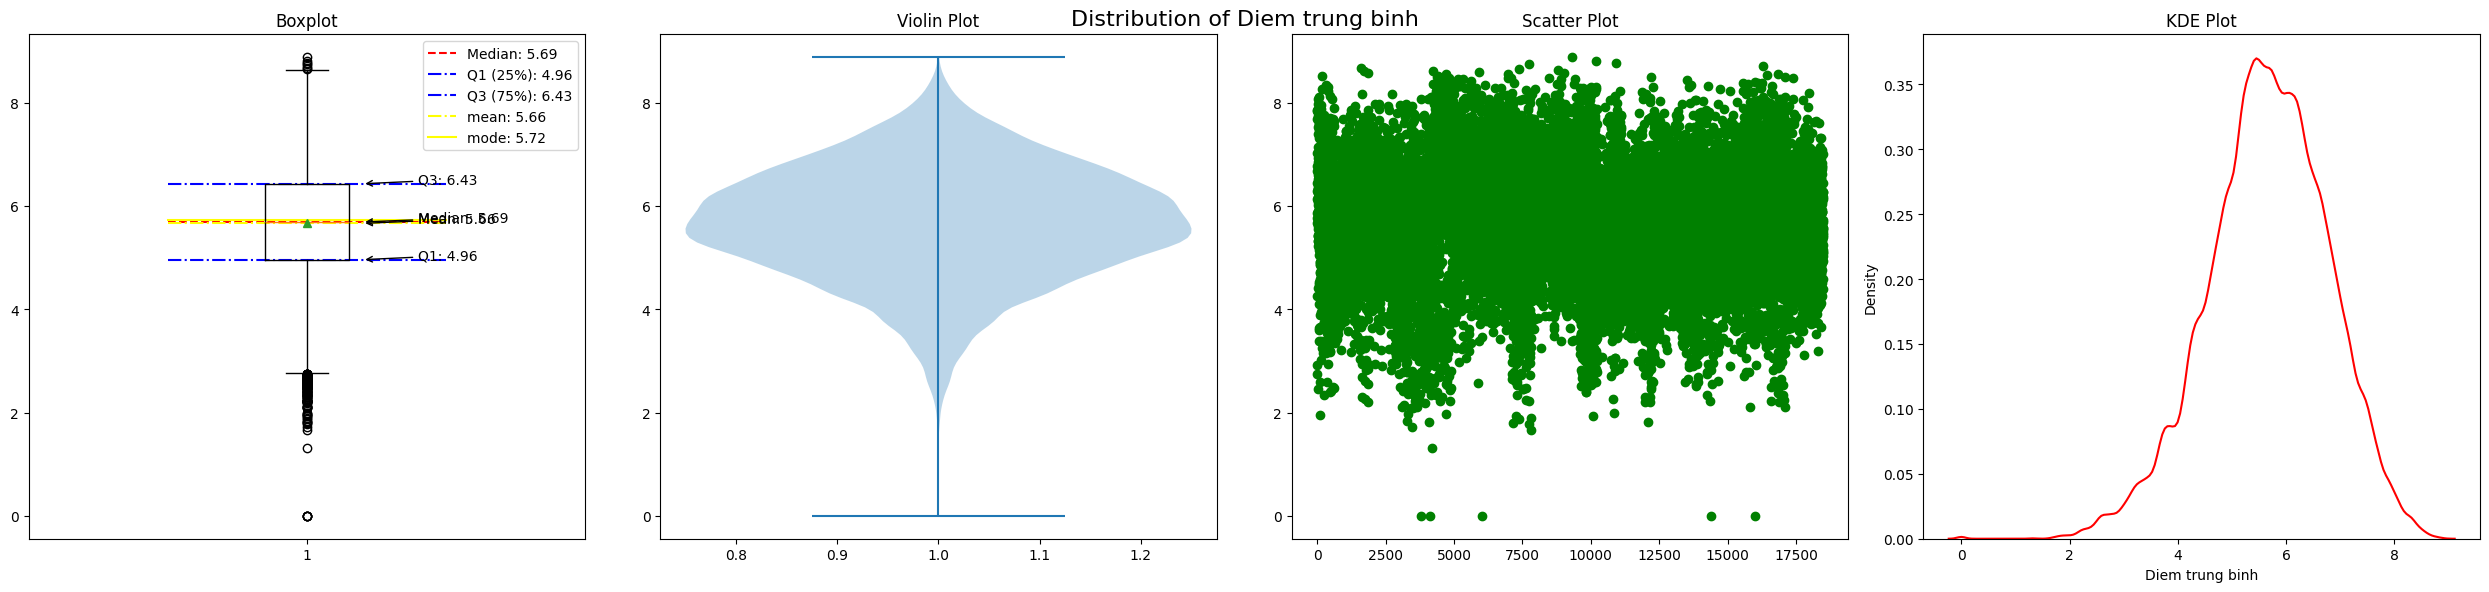

In [18]:
plot_distributions('Diem trung binh')

Thực hiện hiển thị số điểm cùng với số lượng thí sinh đạt điểm đó trong một môn học:

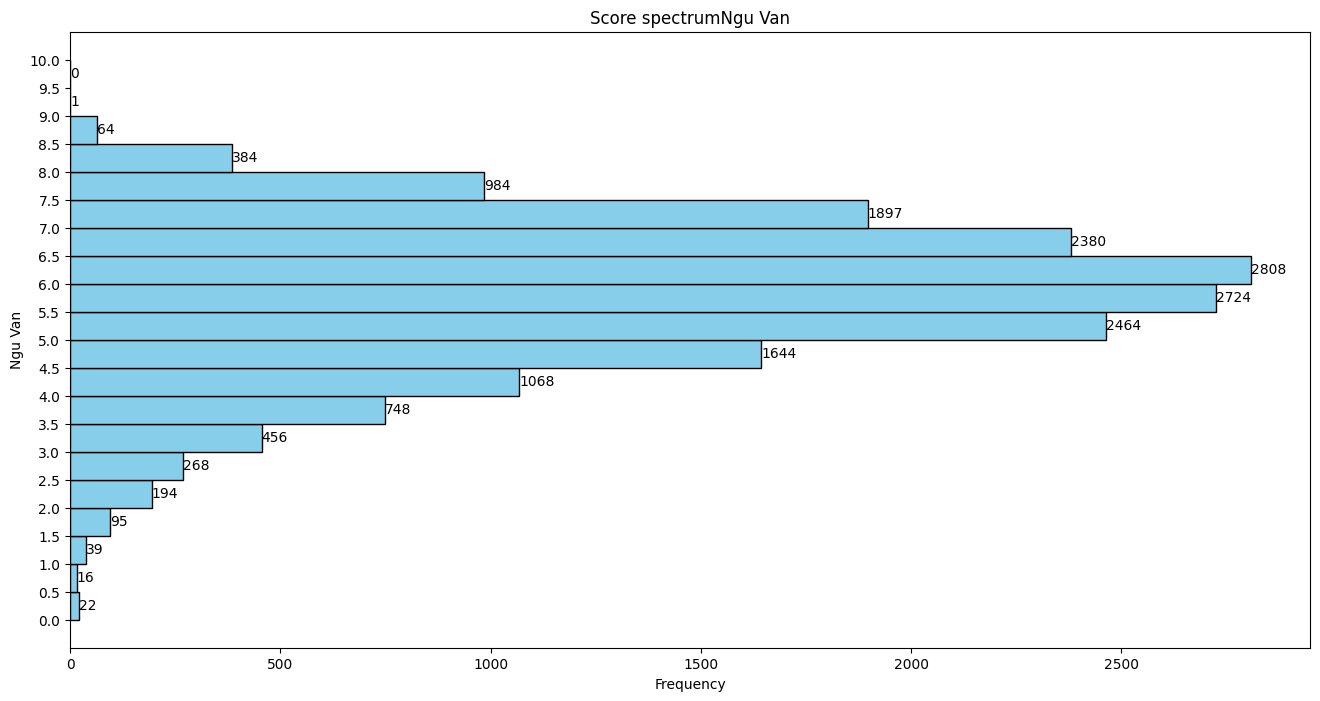

In [59]:
def plot_hist(subject):
    fig, ax = plt.subplots(figsize=(16, 8))

    subject_df = data_number[data_number[subject] >= 0]

    bins = np.arange(0, 10.5, 0.5)

    n, bins, patches = ax.hist(
        subject_df[subject], bins=bins,
        color='skyblue', edgecolor='black',
        orientation='horizontal'
    )
    for i, patch in enumerate(patches):
        ax.text(
            n[i],
            patch.get_y() + patch.get_height() / 2,
            str(int(n[i])), ha='left', va='center'
        )

    ax.set_yticks(bins)

    ax.set_title('Score spectrum' + subject)
    ax.set_xlabel('Frequency')
    ax.set_ylabel(subject)

    plt.show()

plot_hist('Ngu Van')


Nhân ra rằng số lượng thí đạt trên 8 điểm của môn học này là 449. Điểm nhiều thí sinh đạt được nhất là 6 đến 6.5. Có 38 thí sinh bị điểm liệt ở môn học này

Thực hiện in phổ điểm các môn trong một hình ảnh

Tương quan giữa các môn học

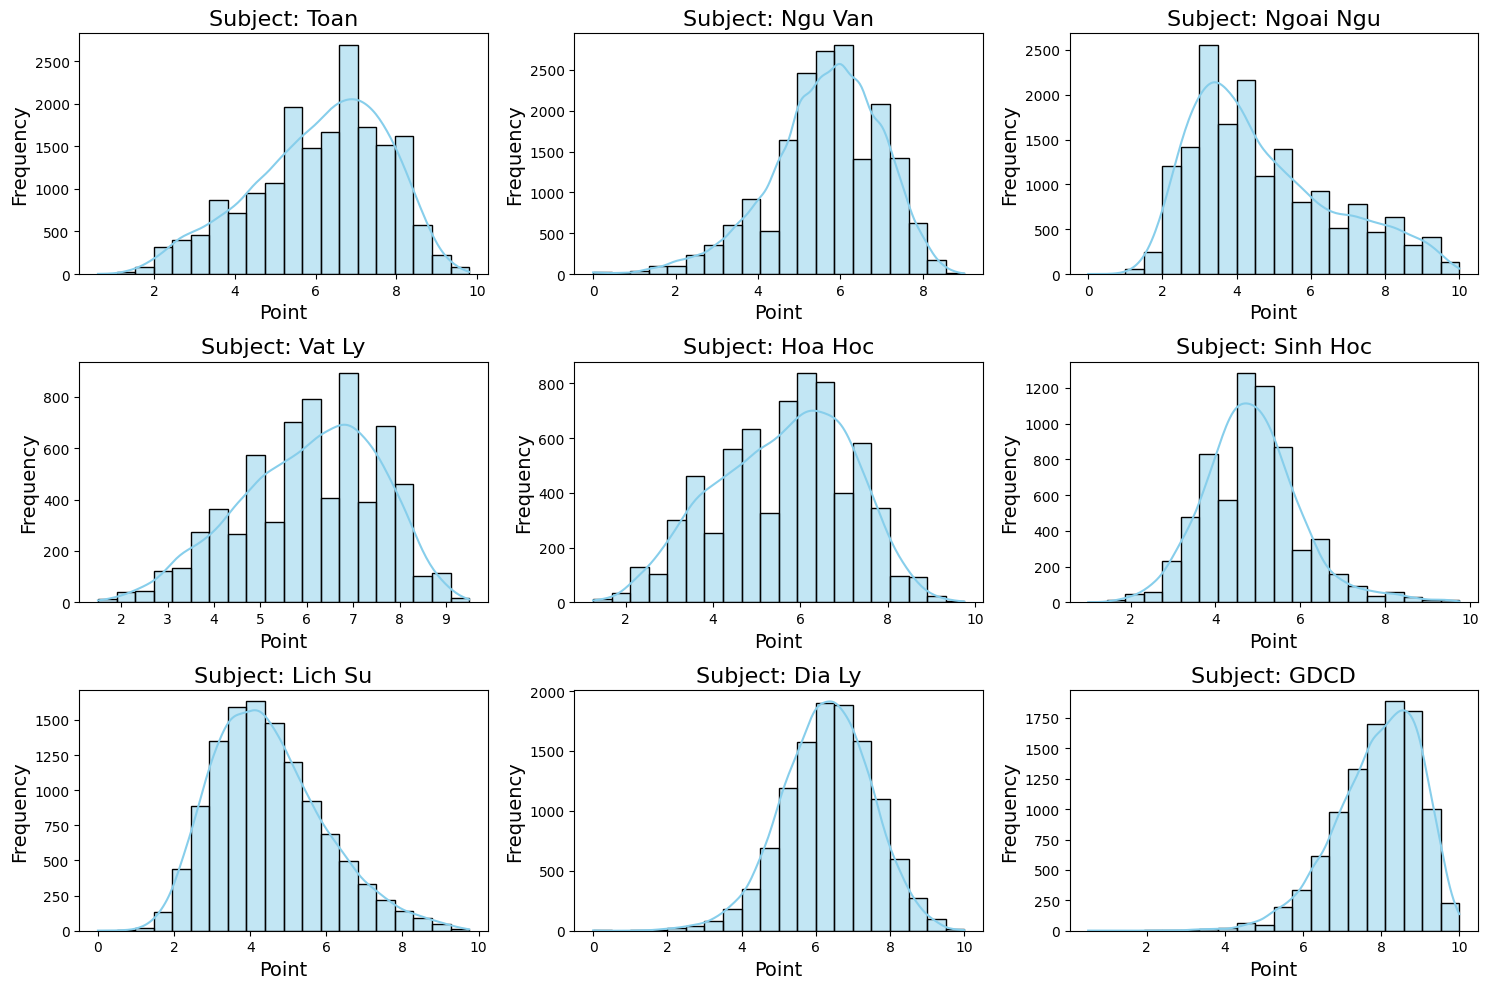

In [56]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_subjects_distribution(subject, ax):
    subject_df = data_number[data_number[subject] >= 0]  # Lọc dữ liệu
    sns.histplot(subject_df[subject], bins=20, kde=True, color='skyblue', edgecolor='black', ax=ax)

    ax.set_title(f'Subject: {subject}', fontsize=16)
    ax.set_xlabel('Point', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

fig, ax = plt.subplots(3, math.ceil(len(subject_list) / 3), figsize=(15, 10))

for i, subject in enumerate(subject_list):
    row = i // math.ceil(len(subject_list) / 3)
    col = i % math.ceil(len(subject_list) / 3)
    plot_subjects_distribution(subject, ax[row, col])


for j in range(i + 1, 2 * math.ceil(len(subject_list) / 3)):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.show()


Nhận thấy rằng hầu hết các môn phổ điểm đều có hình chuông cao nhất là môn giáo dục công dân và thấp nhất là môn tiếng anh

Thực hiện hiển thị phổ điểm theo các khối

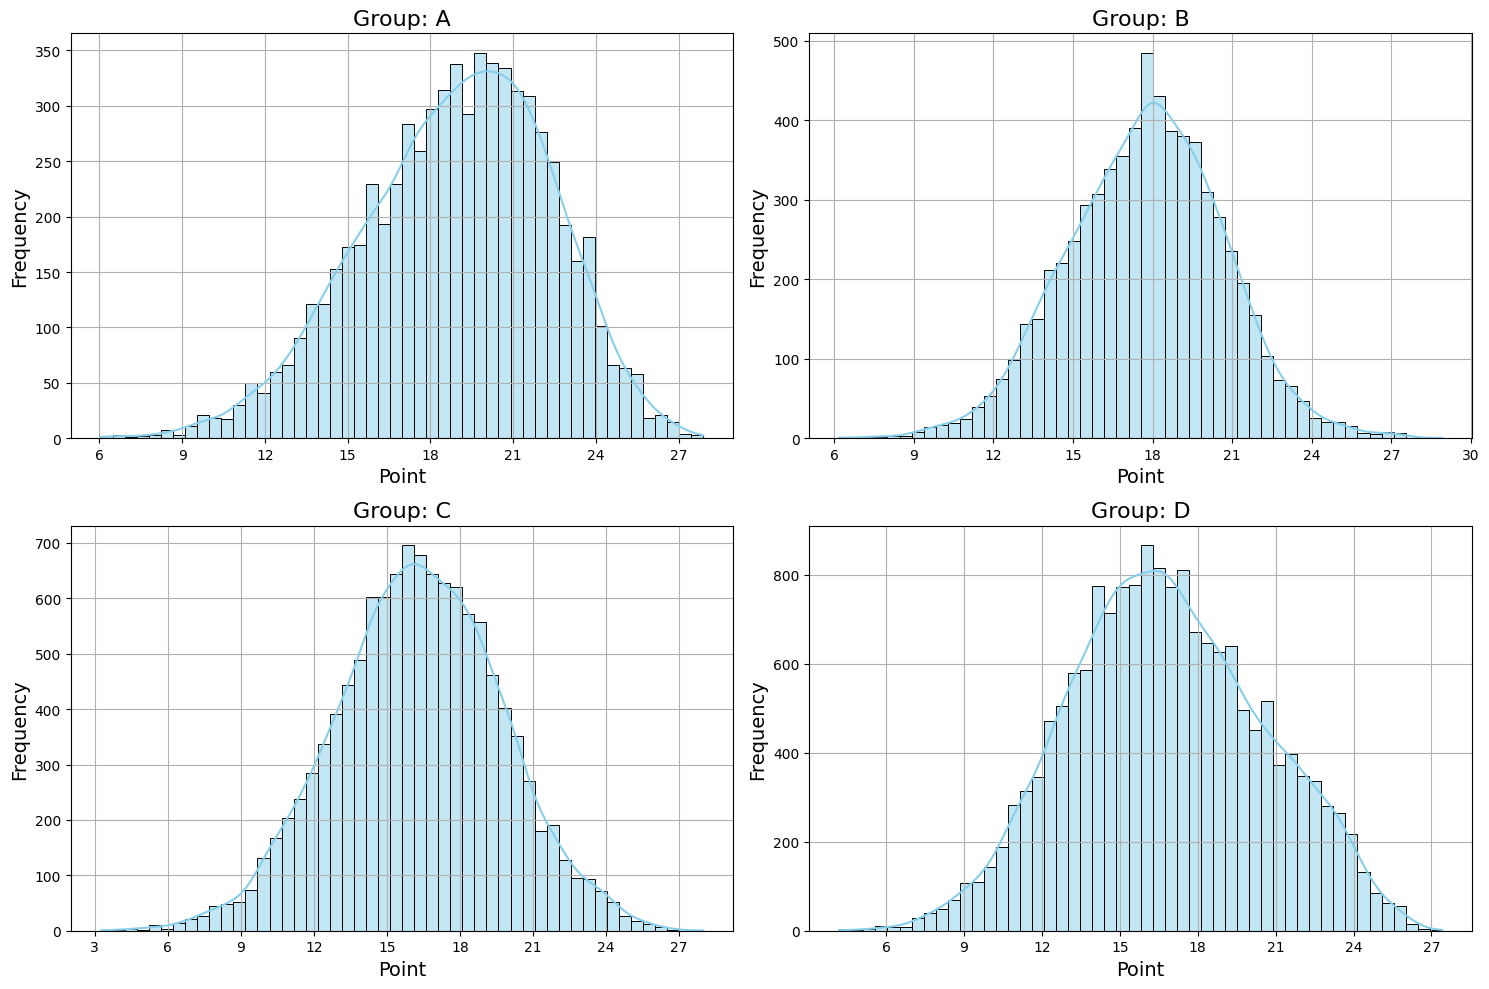

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Giả định 'data' đã được định nghĩa trước đó
groups = {'A': ['Toan', 'Vat Ly', 'Hoa Hoc'],
           'B': ['Toan', 'Sinh Hoc', 'Hoa Hoc'],
           'C': ['Ngu Van', 'Lich Su', 'Dia Ly'],
           'D': ['Toan', 'Ngu Van', 'Ngoai Ngu'],
           }

def plot_group_distribution(group, ax):
    group_df = data[groups[group]].dropna().sum(axis=1)

    # Tăng số lượng bins lên 50
    sns.histplot(group_df, bins=50, kde=True, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Group: {group}', fontsize=16)
    ax.set_xlabel('Point', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

    # Thay đổi ticks cho trục x
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Giới hạn ticks thành số nguyên

    # Thêm lưới
    ax.grid(True)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i, group in enumerate(groups):
    row = i // 2
    col = i % 2
    plot_group_distribution(group, ax[row][col])

plt.tight_layout()
plt.show()


Nhận thấy rằng phổ điểm các khối đều có phân phối hình chuông đa số điểm các thí sinh nằm trong khoảng giữa

Đối với khối A: sườn phải của phân phối dốc chứng tỏ các thí sinh có điểm từ trên 24 điểm giảm mạnh độ khó của đề từ những câu trên điểm 8 đã phân hóa hơn\
Đối với khối B: số lượng các thí sinh đã bắt đầu giảm từ những điểm 22 chứng tỏ khối thi này khó hơn với số lượng thí sinh đạt điểm cao thấp hơn so với khối A\
Đối với khối C: Có phân phối hình chuông khá đẹp hai sườn có độ dốc tương  đương gần như phổ điểm này tuân theo phân phối chuẩn \
Đối với khối D: sường bên phải của đồ thị này có vẻ thoải hơn chứng tỏ số lượng thí sinh đạt điểm cao từ trên 21 điểm là khá lớn

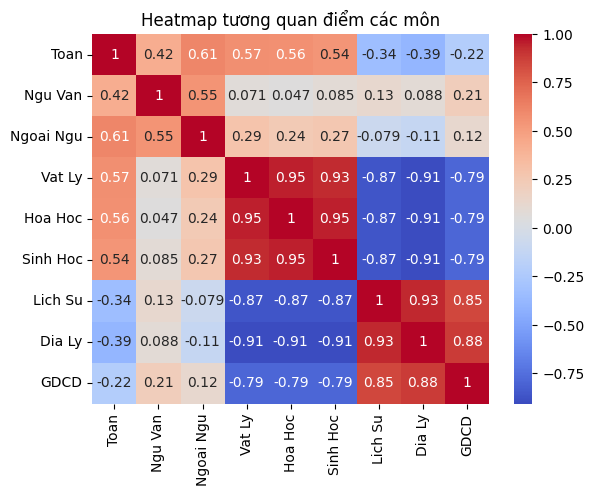

In [ ]:
sns.heatmap(data_number[subject_list].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap tương quan điểm các môn')
plt.show()

Từ biểu đồ head map sau ta có thể nhận ra một điều rất rõ ràng rằng
ba môn khối khxh là lịch sử địa lý và gdcd có sự tương quan lớn với nhau cũng như toán hóa sinh của bên khối khtn. Rõ ràng các thí sinh có xu hướng học đều các môn trong khối thi của họ (thấp thì cả ba môn đều thấp còn cao thì có xu hướng cả ba môn đều cao)